In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from logistic_regression import LogisticRegression
from sklearn.linear_model import LogisticRegression as LgReg
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


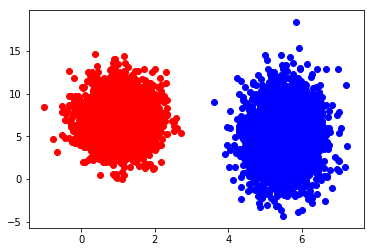

In [2]:
# Generate synthetic data
x1 = 1 + .5 * np.random.randn(3000)
x2 = 5.5 + .5 * np.random.randn(3000)
y1 = 7 + 2.1 * np.random.randn(3000)
y2 = 5 + 3 * np.random.randn(3000)
plt.scatter(x1,y1,color='red')
plt.scatter(x2,y2,color='blue')
plt.show()

In [3]:
# Preprocess generated data
trainset = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
trainset = np.array(list(zip(trainset, y)))
target = np.array((-np.ones(3000), np.ones(3000))).ravel()

In [4]:
# Standardize data
scaler = StandardScaler().fit(trainset)
trainset_std = scaler.transform(trainset)
X_train, X_test, y_train, y_test = train_test_split(trainset_std, target, test_size=0.3)

In [12]:
# Divide by zero warning appears due to precision restriction in numpy,
# so it is essential to set some precision variables.
logreg = LogisticRegression(n_iters=10000, learning_rate=0.001).fit(X_train, y_train)

/home/matt/work/dev/ml/ml-sandbox/classifiers/logistic_regression/logistic_regression.py:17: RuntimeWarning: divide by zero encountered in log
  errors = - y * np.log(phi_z) - (1 - y)*np.log(1 - phi_z)
/home/matt/work/dev/ml/ml-sandbox/classifiers/logistic_regression/logistic_regression.py:17: RuntimeWarning: invalid value encountered in multiply
  errors = - y * np.log(phi_z) - (1 - y)*np.log(1 - phi_z)
/home/matt/work/dev/ml/ml-sandbox/classifiers/logistic_regression/logistic_regression.py:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-self.net_input(X)))


In [13]:
# As we can see, model still gives very good predictions.
# Overflow warning has the same reason as 'divide-by-zero'
print(accuracy_score(y_test, logreg.predict(X_test)))

0.975


/home/matt/work/dev/ml/ml-sandbox/classifiers/logistic_regression/logistic_regression.py:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-self.net_input(X)))


In [7]:
# Train sklearn Linear regressor:
sklogreg = LgReg(C=1000.0)
sklogreg.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
print(accuracy_score(y_test, sklogreg.predict(X_test)))

1.0
